<a href="https://colab.research.google.com/github/brenopelegrin/lab-avancado1/blob/dev/lab_avan%C3%A7ado_interferometro_fft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bibliotecas e git clone


In [26]:
!pip install LabIFSC2
!git clone https://github.com/brenopelegrin/lab-avancado1.git --depth 1 --branch dev
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sci
import LabIFSC2 as lab

import os
plt.style.use("ggplot")

fatal: destination path 'lab-avancado1' already exists and is not an empty directory.


## Importar dados


In [27]:
def carregar_dados(path)->np.ndarray:
  df=pd.read_csv(path,sep=";")
  columns_to_remove=[df.columns[x] for x in [0,2,3,4]]
  df=df.drop(columns=[*columns_to_remove])[0:4095]
  df=df.rename(columns={df.columns[0]:"voltagem"})
  df["voltagem"]=df["voltagem"].map(lambda x: lab.Medida(100*float(x.replace(",",".")),"mV",0))
  array=df["voltagem"].to_numpy()
  return array - np.mean(array)

dados:dict[str,pd.DataFrame]={}

for root, dirs, files in os.walk("/content/lab-avancado1/dados_interferometro_fft_dia_1"):
    for filename in files:
      if filename.endswith(".csv"):
        dados[filename]=carregar_dados(os.path.join(root,filename))

tempos=np.array([lab.Medida(x*50,"ms",0) for x in range(0,4095)])




/tmp/ipython-input-453091428.py:2: DtypeWarning: Columns (1,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(path,sep=";")


## Fator de Calibração Laser Vermelho
632.8nm

In [28]:
rfft_y=np.fft.irfft(lab.nominais(dados["resultados_original_vermelho1.csv"],"mV"))
lambda_pico=np.argmax(np.abs(rfft_y))
lambda_laser_vermelho=lab.Medida(632.8,"nm",0)
lambdas=np.array([i*(lambda_laser_vermelho/(lambda_pico)) for i in range(len(rfft_y))])

## Gráficos

In [29]:
def grafico(nome_arquivo_csv:str,lambda_esperados:list[lab.Medida]=[],
            time_interval=lab.Medida(5,"s",0),
            lambda_interval=lab.Medida(1000,'nm',0))->(plt.Figure,plt.axis):
  unidade_voltagem="mV"
  unidade_tempo="s"
  unidade_lambda="nm"
  #x and y lim
  fig,axis=plt.subplots(ncols=2,figsize=(12.8,7.2),dpi=100)
  t_max=next((x for x in tempos if x>time_interval))
  axis[0].set_xlim(0,t_max.nominal(unidade_tempo))

  lambda_max=next(x for x in lambdas if x>lambda_interval)
  axis[1].set_xlim(0,lambda_max.nominal(unidade_lambda))

  voltagens=dados[nome_arquivo_csv]
  axis[0].plot(lab.nominais(tempos,unidade_tempo),
              lab.nominais(voltagens,unidade_voltagem),
               color="blue")
  axis[0].set_ylabel(f"Voltagem ({unidade_voltagem})")
  axis[0].set_xlabel(f"Tempo ({unidade_tempo})")

  y_fft=np.abs(np.fft.irfft(lab.nominais(voltagens,"mV")))
  axis[1].plot(lab.nominais(lambdas,unidade_lambda),
  y_fft)
  axis[1].set_xlabel(f"Comprimento de onda ({unidade_lambda})")
  for lambda_esperado in lambda_esperados:
    axis[1].axvline(lambda_esperado.nominal(unidade_lambda),alpha=0.5,
                    linestyle="dashed",
                    color="green",
                    label=f"Esperado: {lambda_esperado.nominal(unidade_lambda):.1f} nm")
  axis[1].set_ylabel(f"Amplitude")
  axis[1].legend()
  return (fig,axis)


## Vermelho (Calibração)

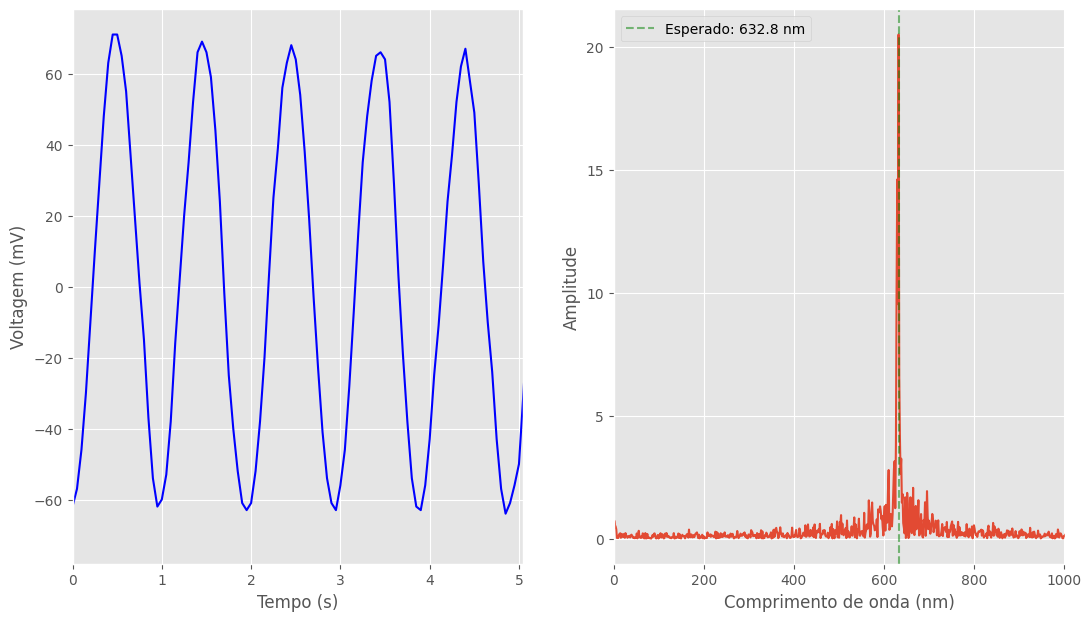

In [30]:
fig,axis=grafico("resultados_original_vermelho1.csv",[lab.Medida(632.8,"nm",0)])
fig.savefig("vermelho.png")

## Verde

/tmp/ipython-input-1763566633.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axis[1].legend()


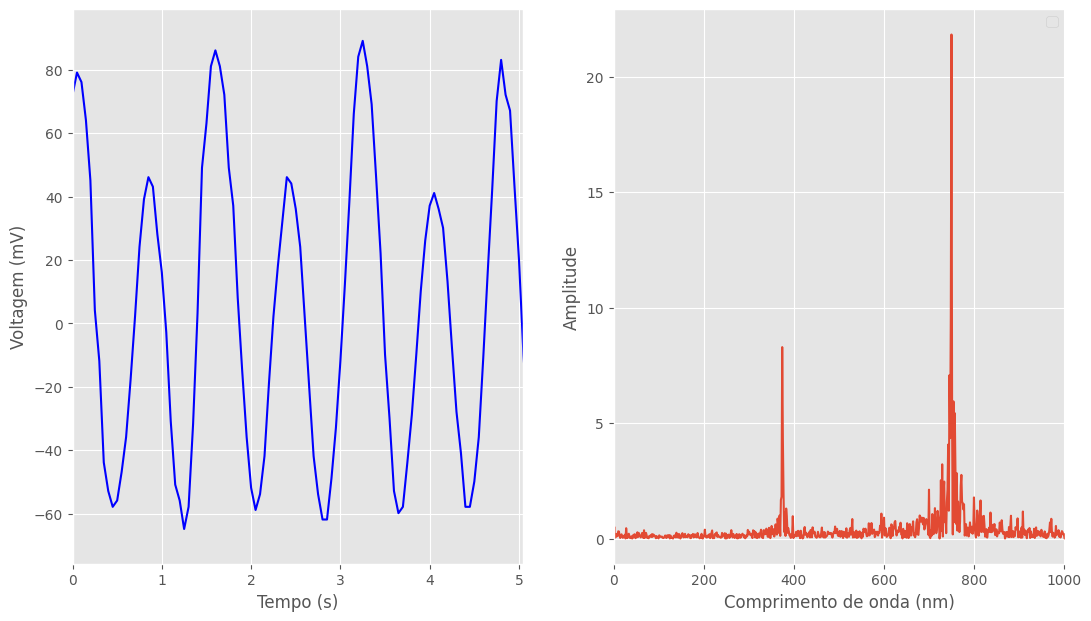

In [31]:
fig,axis=grafico("verde_foda.csv")
fig.savefig("verde.png")

## Amarelo

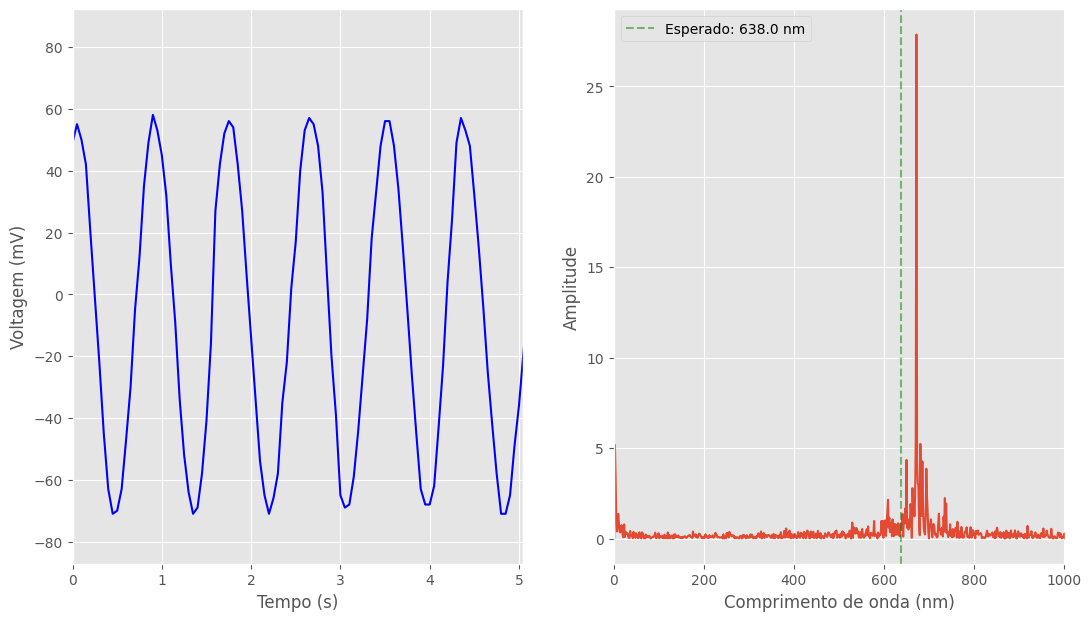

In [32]:
fig,axis=grafico("amarelo2.csv",[lab.Medida(638,"nm",0)])
fig.savefig("amarelo.png")

## Vermelho +Verde

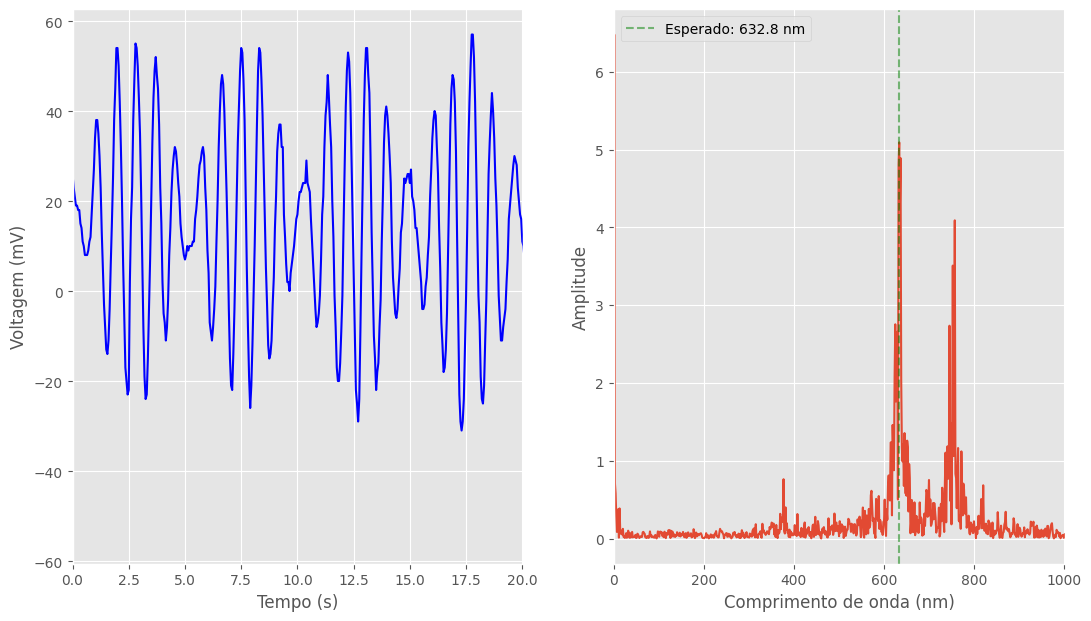

In [33]:
fig,axis=grafico("resultados_vermelho_verde_2.csv",[lab.Medida(632.8,"nm",0)],time_interval=lab.Medida(20,"s",0))
fig.savefig("vermelho_verde.png")

## Vermelho + Amarelo

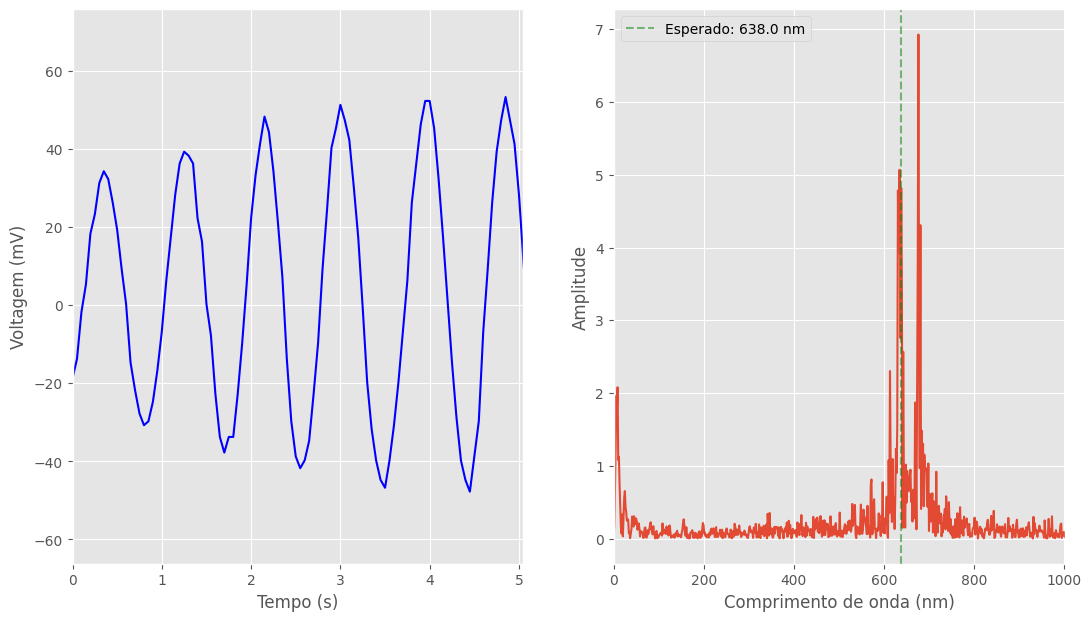

In [34]:
fig,axis=grafico("resultados_amarelo+vermelho2.csv",[lab.Medida(638,"nm",0)])
fig.savefig("vermelho_amarelo.png")

## Amarelo + Verde

/tmp/ipython-input-1763566633.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axis[1].legend()


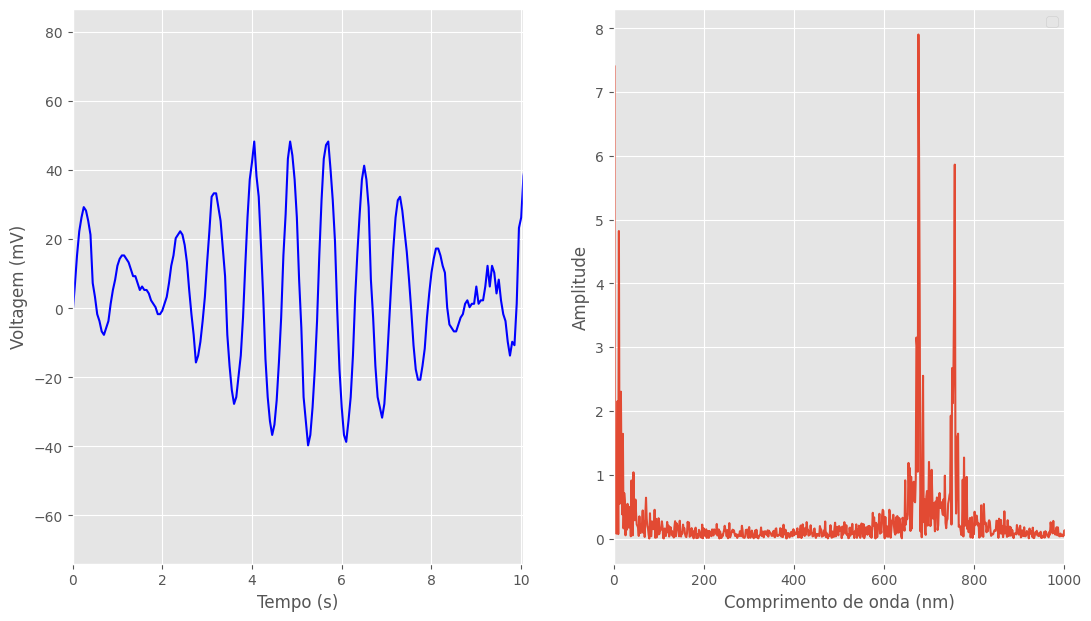

In [35]:
fig,axis=grafico("resultados_amarelho_verde_2.csv",time_interval=lab.Medida(10,"s",0))
fig.savefig("amarelo_verde.png")

## Vermelho + Verde + Amarelo

/tmp/ipython-input-1763566633.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axis[1].legend()


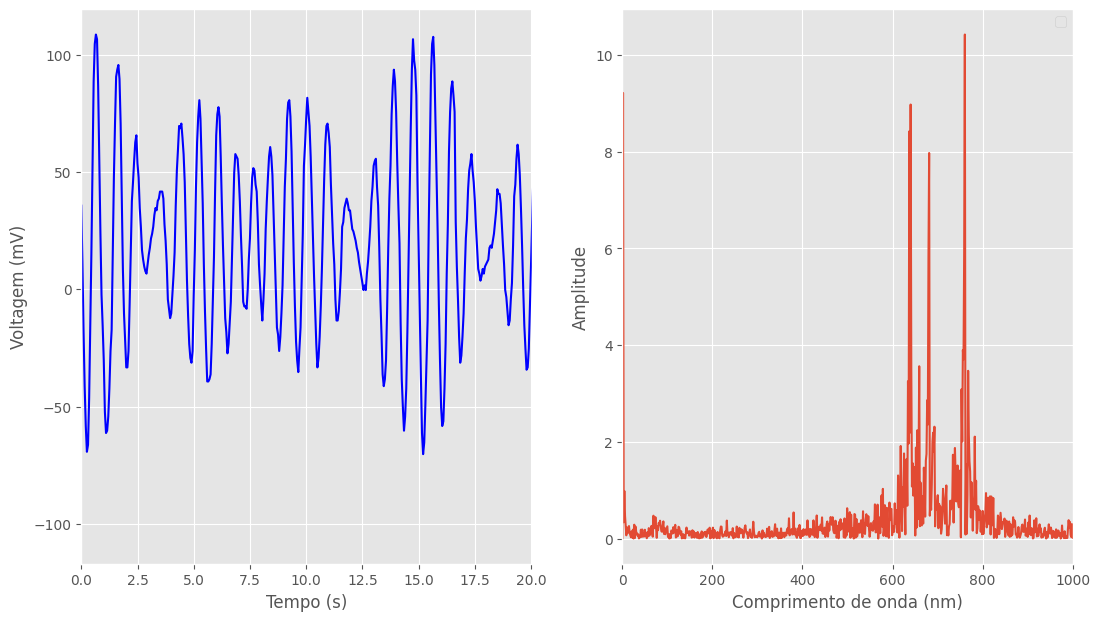

In [36]:
fig,axis=grafico("resultado_todos_1.csv",time_interval=lab.Medida(20,"s",0))
fig.savefig("vermelho_verde_amarelo.png")